In [548]:
#Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)


In [549]:
#loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [550]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [551]:
#checking shape of the dataset
df.shape

(7043, 21)

In [552]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [553]:
#cheking null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

no null values is present 

# Checking Datatype of the columns 

In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 The dataset contains 2 int columns 1 float and 19 object columns 

In [555]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

we can observe that the TotalCharges has continuos  data but it  showing object datatype let us handle this column

In [556]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [557]:
df.loc[df['TotalCharges']==" "].shape

(11, 21)

we saw that some columns have space asthe value so we handle that space values

In [558]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

# Checking null values:

In [559]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

 null values is present in the Total_charges column 

<AxesSubplot:>

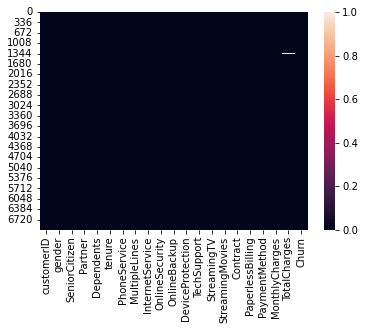

In [560]:
sns.heatmap(df.isnull())

conerting the datatype from object to  float

In [561]:
df['TotalCharges']=df['TotalCharges'].astype(float)

so space values in the TotalCharges column  has replace by nan value , now that we can filli that  nan values by fillna method

# Handlig Nan values

In [562]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [563]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

now  no values is present in the dataset

In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The Total_chrges column is sucessfully converted in to float

# Dropping  Unwanted columns :

In [565]:
df.drop('customerID',axis=1,inplace=True)

In [566]:
df.duplicated().sum()

22

In [567]:
df1=df.drop_duplicates()
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Data Visualization:

Here we can most of the columns are  categorical so we will coutplot to check the frequency of the columns

In [568]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

0    5880
1    1141
Name: SeniorCitizen, dtype: int64


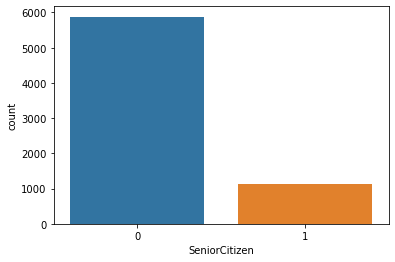

In [569]:
sns.countplot(x='SeniorCitizen',data=df1)
print(df1['SeniorCitizen'].value_counts())

The SeniorCitizen column contain younger customer=5901 and senior citizen=1142 data

No     5164
Yes    1857
Name: Churn, dtype: int64


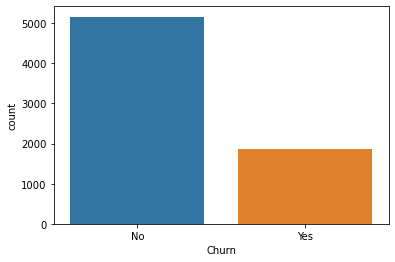

In [570]:
sns.countplot(x='Churn',data=df1)
print(df1['Churn'].value_counts())

The churn column contain 5174 no and 1869 yes datapoints

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


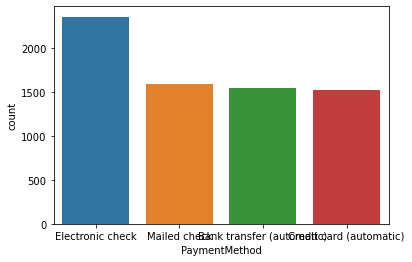

In [571]:
sns.countplot(x='PaymentMethod',data=df1)
print(df1['PaymentMethod'].value_counts())

The PaymentMethod column contain 2500 electronic check and 1600 mailed check 1510 bank tranfer   datapoints

Yes    4161
No     2860
Name: PaperlessBilling, dtype: int64


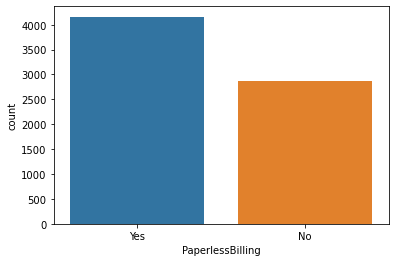

In [572]:
sns.countplot(x='PaperlessBilling',data=df1)
print(df1['PaperlessBilling'].value_counts())

The churn column contain 4100 yes and 2800 no datapoints

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64


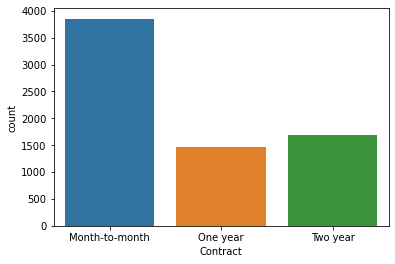

In [573]:
sns.countplot(x='Contract',data=df1)
print(df1['Contract'].value_counts())

The contract column contains Month-to-month    3875,Two year 1695,One year 1473

No                     2777
Yes                    2732
No internet service    1512
Name: StreamingMovies, dtype: int64


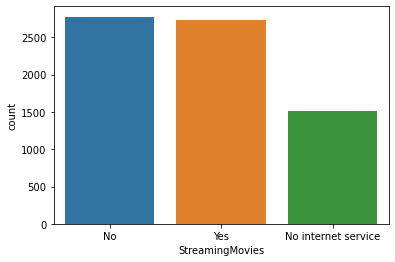

In [574]:
sns.countplot(x='StreamingMovies',data=df1)
print(df1['StreamingMovies'].value_counts())

The StreamingMovies column contains No  2785,Yes 2732,No internet service 1526

No                     2802
Yes                    2707
No internet service    1512
Name: StreamingTV, dtype: int64


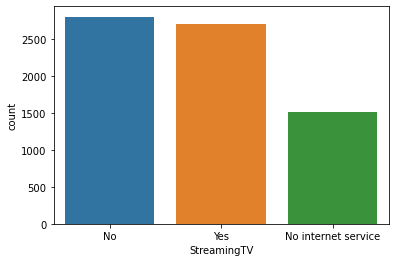

In [575]:
sns.countplot(x='StreamingTV',data=df1)
print(df1['StreamingTV'].value_counts())

The StreamingTV column contains No 2810,Yes  2707,No internet service 1526

No                     3465
Yes                    2044
No internet service    1512
Name: TechSupport, dtype: int64


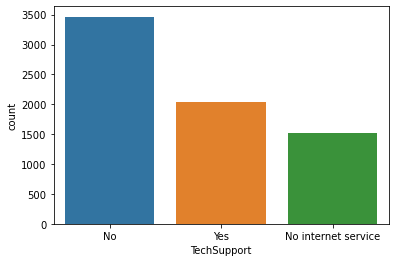

In [576]:
sns.countplot(x='TechSupport',data=df1)
print(df1['TechSupport'].value_counts())

No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64


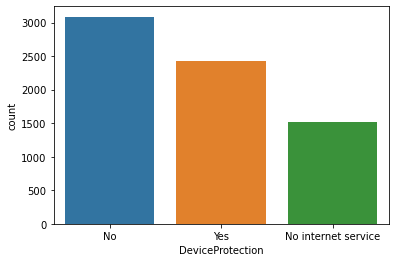

In [577]:
sns.countplot(x='DeviceProtection',data=df1)
print(df1['DeviceProtection'].value_counts())

No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64


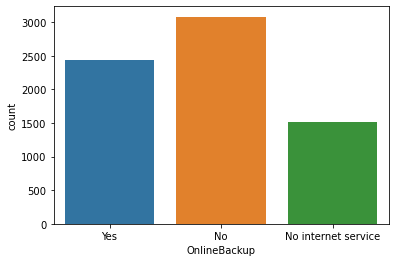

In [578]:
sns.countplot(x='OnlineBackup',data=df1)
print(df1['OnlineBackup'].value_counts())

No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64


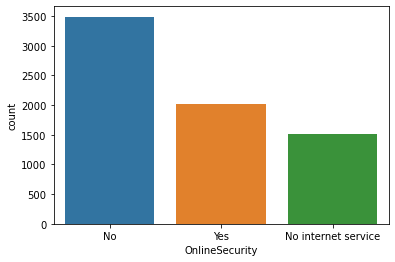

In [579]:
sns.countplot(x='OnlineSecurity',data=df1)
print(df1['OnlineSecurity'].value_counts())

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


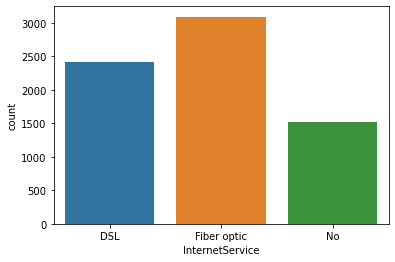

In [580]:
sns.countplot(x='InternetService',data=df1)
print(df1['InternetService'].value_counts())

No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


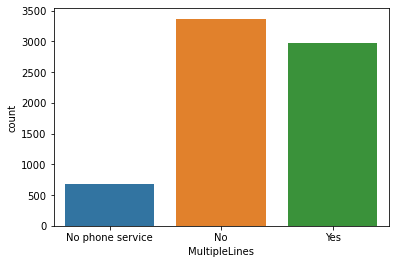

In [581]:
sns.countplot(x='MultipleLines',data=df1)
print(df1['MultipleLines'].value_counts())

Yes    6339
No      682
Name: PhoneService, dtype: int64


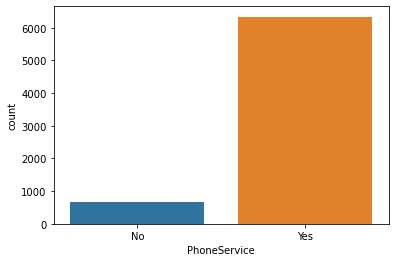

In [582]:
sns.countplot(x='PhoneService',data=df1)
print(df1['PhoneService'].value_counts())

1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


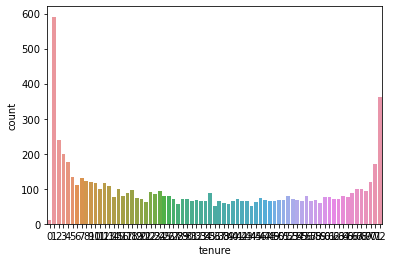

In [583]:
sns.countplot(x='tenure',data=df1)
print(df1['tenure'].value_counts())

No     4911
Yes    2110
Name: Dependents, dtype: int64


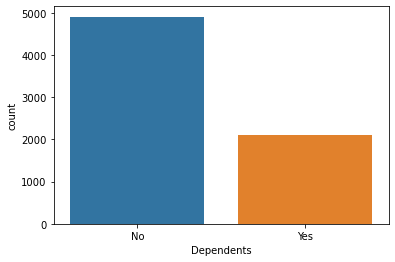

In [584]:
sns.countplot(x='Dependents',data=df1)
print(df1['Dependents'].value_counts())

No     3619
Yes    3402
Name: Partner, dtype: int64


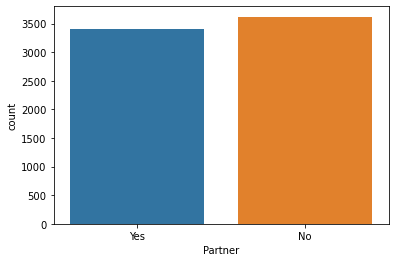

In [585]:
sns.countplot(x='Partner',data=df1)
print(df1['Partner'].value_counts())

0    5880
1    1141
Name: SeniorCitizen, dtype: int64


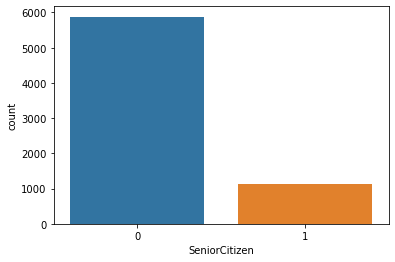

In [586]:
sns.countplot(x='SeniorCitizen',data=df1)
print(df1['SeniorCitizen'].value_counts())

Male      3541
Female    3480
Name: gender, dtype: int64


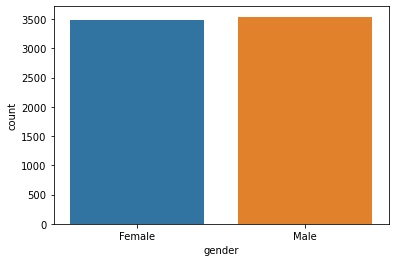

In [587]:
sns.countplot(x='gender',data=df1)
print(df1['gender'].value_counts())

In [588]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


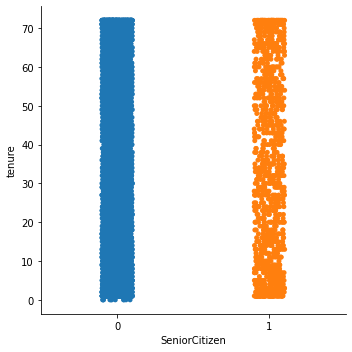

In [589]:
sns.catplot(x='SeniorCitizen',y='tenure',data=df1)

# Using Transformation Technique:

our dataset contains lots object  data orstring data so we have to convert the string data into nmeric data by encoding technique 

In [590]:
from sklearn.preprocessing import LabelEncoder

In [591]:
#by using for loop here we encoded the object columns
le =LabelEncoder()

list1=['gender','Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','Churn']
for val in list1:
    df1[val]=le.fit_transform(df1[val].astype(str))


In [592]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


we convert the string data into numeric data

In [593]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.504344,0.162512,0.484546,0.300527,32.469449,0.902863,0.943455,0.870816,0.790486,0.907278,0.905284,0.797607,0.986469,0.993591,0.692636,0.592651,1.570716,64.851894,2290.342338,0.264492
std,0.500017,0.368947,0.499797,0.458520,24.534965,0.296166,0.948575,0.737076,0.860730,0.880999,0.880787,0.862432,0.885762,0.885842,0.834163,0.491376,1.067530,30.069001,2265.044153,0.441094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.750000,411.150000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.400000,1410.250000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.900000,3801.700000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Documentation:
    -No missing value is present in the dataset.
    
    -std dev is high in tenure,paymentmethpd, MonthlyCharges,TotalCharges columns.
    
    -the min value of all columns is zero except  MonthlyCharges,TotalCharges columns.
    
    -ouliers is present in the tenure,paymentmethpd, MonthlyCharges,TotalCharges columns.
    


# Checking Correlation:

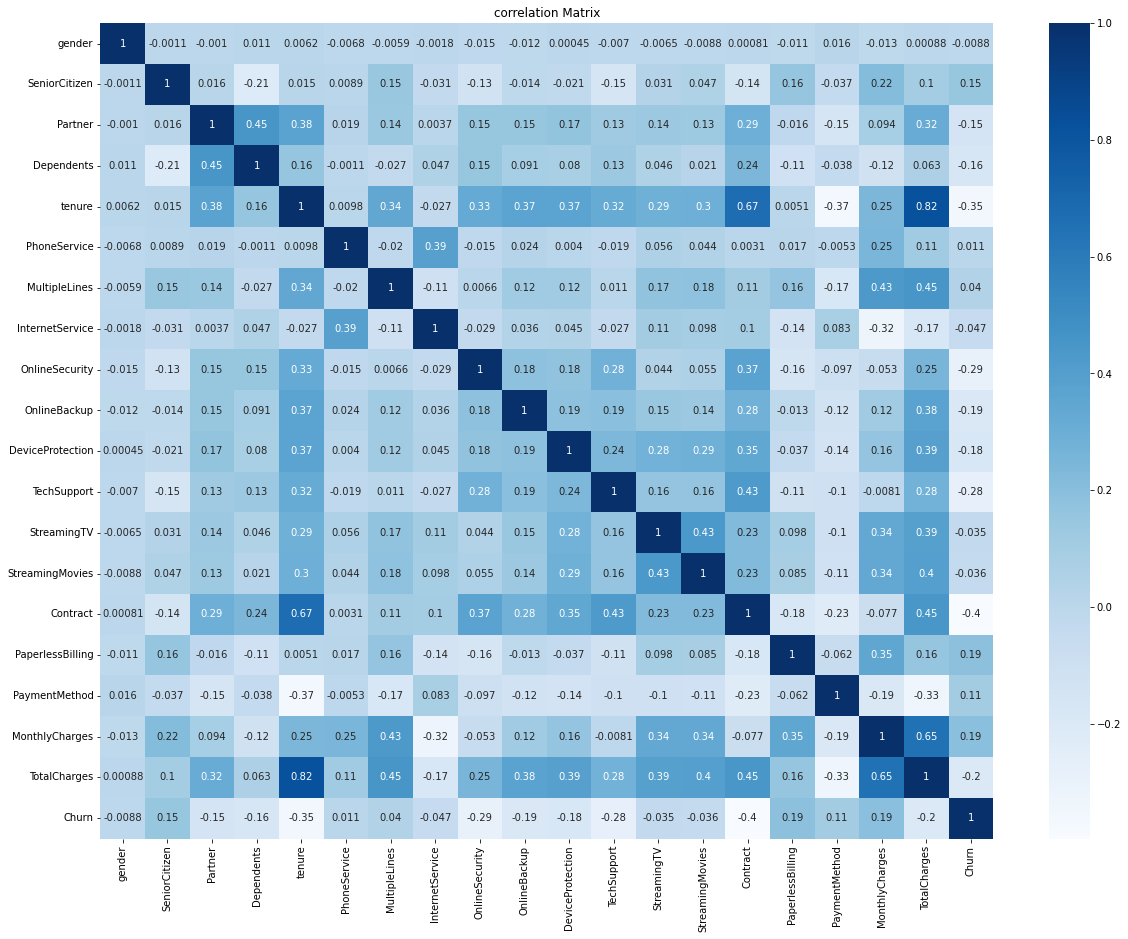

In [594]:
corr_mat=df1.corr()

plt.figure(figsize=[20,15])#
sns.heatmap(corr_mat,annot=True,cmap="Blues")#--> annot = true means will print values
plt.title("correlation Matrix")
plt.show()

Documnetation:
    
    -Tenure columns is highly positively correlated with the label column, which contributing more
    
    -Payment method column is negatively correlated with the TotalChrags
    
    -Monthlycharges columnis positively correlated with the label
    
    -papersbilling is positively correlated with the label
    
    -PaymentMethod is Churn,InternetService, these columns is negatively correlated with the label 
    
    - no multicollinearity problem exist

# Corlelation with Output columns

In [661]:
corr_mat['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.194508
PaperlessBilling    0.190891
SeniorCitizen       0.151619
PaymentMethod       0.106238
MultipleLines       0.040175
PhoneService        0.011323
gender             -0.008763
StreamingTV        -0.034591
StreamingMovies    -0.036492
InternetService    -0.047366
Partner            -0.149135
Dependents         -0.163459
DeviceProtection   -0.176770
OnlineBackup       -0.194214
TotalCharges       -0.198303
TechSupport        -0.281654
OnlineSecurity     -0.288505
tenure             -0.351508
Contract           -0.396531
Name: Churn, dtype: float64

# checking data distribution 

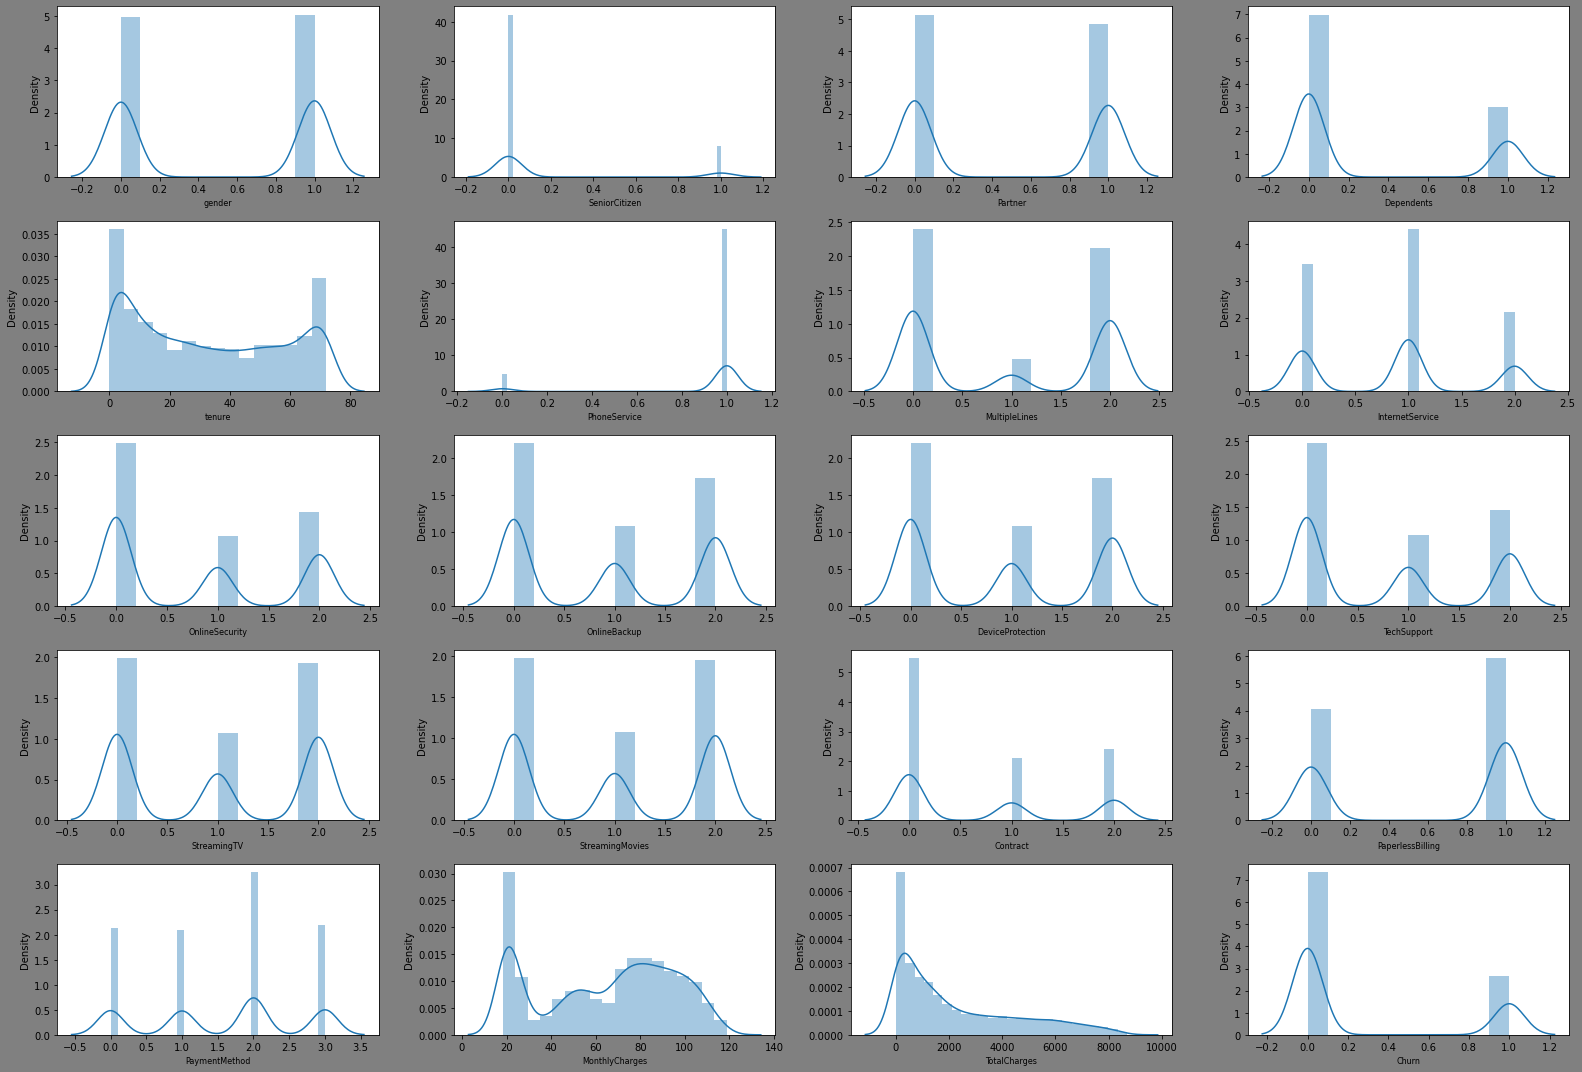

In [596]:
plt.figure(figsize=(22,15),facecolor='gray')
plotnumber=1

for column in df1:
    if plotnumber<=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

observations

The data is skewed in columns.

The distribution is not normally distributedi all columns.so we convert the skewed data into a normal distribution by Log transformer or power transformer method

# Checking and Handling outliers

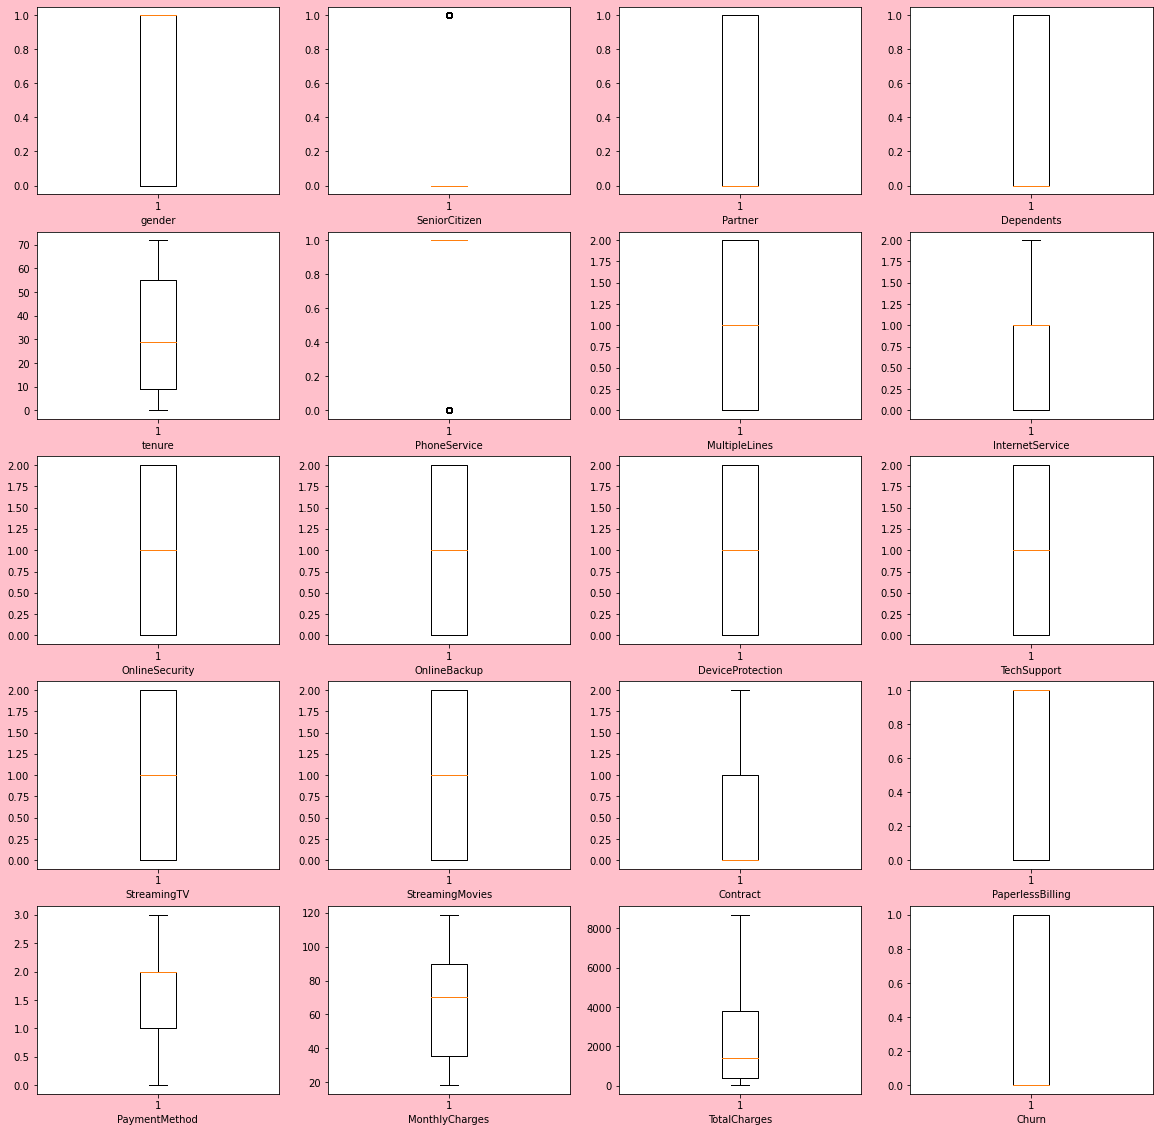

In [597]:
#checking one more time
plt.figure(figsize=(20,20),facecolor='pink')
plotnumber=1

for column in df1:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        plt.boxplot(df1[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()

observtions:
    outliers is present in the columns 

# Univariate Analysis:

<AxesSubplot:>

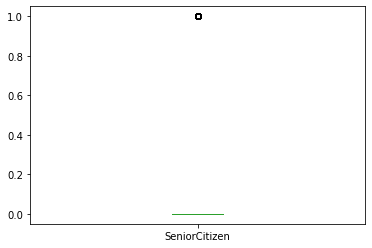

In [598]:
df1['SeniorCitizen'].plot.box()

<AxesSubplot:>

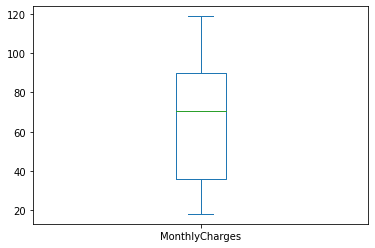

In [599]:
df1['MonthlyCharges'].plot.box()

<AxesSubplot:>

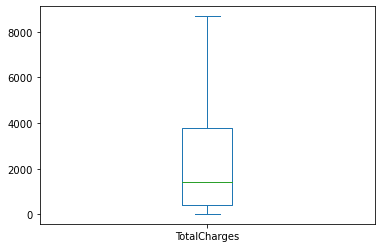

In [600]:
df1['TotalCharges'].plot.box()

# Using Zscore outlier removing technique

In [607]:
from scipy.stats import zscore

In [608]:
z=np.abs(zscore(df1))
z

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.008726,0.440508,1.031400,0.655475,1.282728,3.048725,0.059614,1.181531,0.918456,1.240410,1.027886,0.924901,1.113775,1.121714,0.830396,0.829057,0.402156,1.164135,0.998061,0.599671
1,0.991349,0.440508,0.969556,0.655475,0.062387,0.328006,0.994674,1.181531,1.405320,1.029902,1.242972,0.924901,1.113775,1.121714,0.368496,1.206190,1.338965,0.262811,0.176981,0.599671
2,0.991349,0.440508,0.969556,0.655475,1.241967,0.328006,0.994674,1.181531,1.405320,1.240410,1.027886,0.924901,1.113775,1.121714,0.830396,0.829057,1.338965,0.365914,0.963490,1.667582
3,0.991349,0.440508,0.969556,0.655475,0.510759,3.048725,0.059614,1.181531,1.405320,1.029902,1.242972,1.394288,1.113775,1.121714,0.368496,1.206190,1.471460,0.750058,0.198506,0.599671
4,1.008726,0.440508,0.969556,0.655475,1.241967,0.328006,0.994674,0.175278,0.918456,1.029902,1.027886,0.924901,1.113775,1.121714,0.830396,0.829057,0.402156,0.194503,0.944284,1.667582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.991349,0.440508,1.031400,1.525611,0.345224,0.328006,1.113903,1.181531,1.405320,1.029902,1.242972,1.394288,1.144329,1.136185,0.368496,0.829057,1.338965,0.663458,0.132388,0.599671
7039,1.008726,0.440508,1.031400,1.525611,1.611307,0.328006,1.113903,0.175278,0.918456,1.240410,1.242972,0.924901,1.144329,1.136185,0.368496,0.829057,0.534652,1.275428,2.239656,0.599671
7040,1.008726,0.440508,1.031400,1.525611,0.875118,3.048725,0.059614,1.181531,1.405320,1.029902,1.027886,0.924901,1.113775,1.121714,0.830396,0.829057,0.402156,1.172450,0.858275,0.599671
7041,0.991349,2.270104,1.031400,0.655475,1.160445,0.328006,1.113903,0.175278,0.918456,1.029902,1.027886,0.924901,1.113775,1.121714,0.830396,0.829057,1.338965,0.317562,0.875870,1.667582


In [609]:
threshold=3
print(np.where(z>3))


(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  972, 1010, 1017, 1036, 1049, 1050, 1052,
       1071, 1109, 1118, 1121, 1143, 1145, 1149, 1160, 1168, 1181, 1203,
       1220, 1224, 1241, 1254, 1256, 1270, 1277, 1297, 1310, 1325, 1330,
       1332, 1333, 1338, 1347, 1350, 1363, 1377, 1400, 1405, 1414, 1450,
       1477, 1478, 1479, 1497, 1503, 1510, 1516, 1557, 1559, 1578, 1581,
       1611, 1617, 1631, 1634, 1649, 1686, 1689, 1

In [610]:
df_new=df1[(z<3).all(axis=1)]
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [611]:
df_new.shape

(6339, 20)

In [612]:
X=df_new.drop('Churn',axis=1)
y=df_new.Churn

# Checking skewness

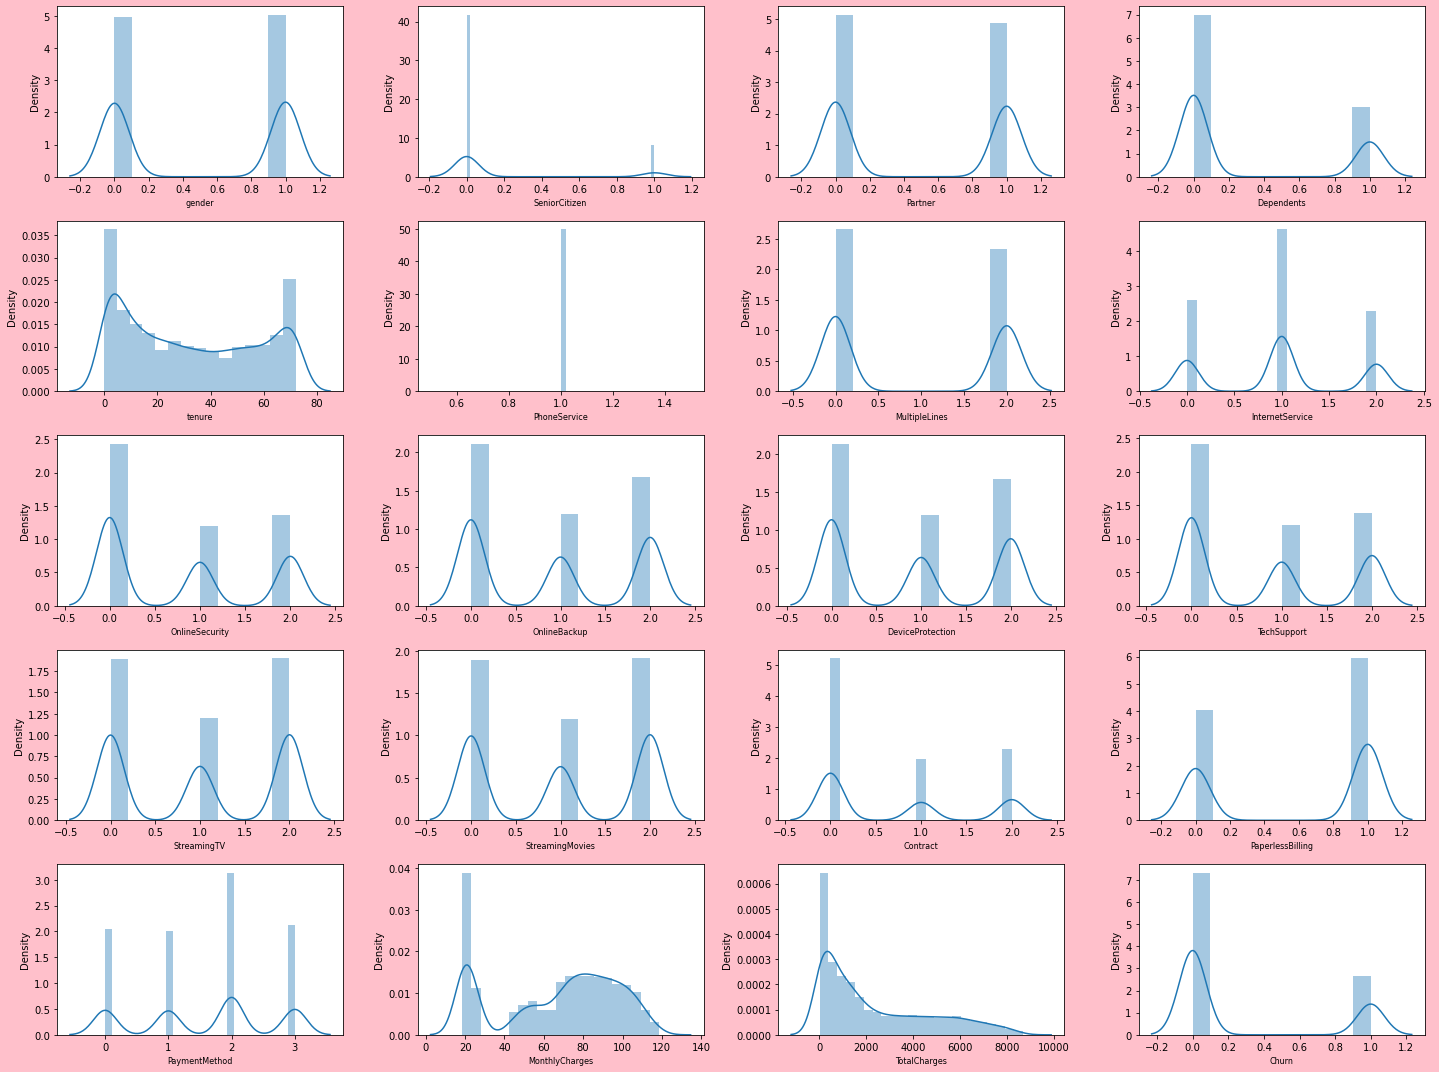

In [613]:
plt.figure(figsize=(20,15),facecolor='pink')
plotnumber=1

for column in df_new:
    if plotnumber<=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_new_z[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()


observations:

here we can see the data is deviated very much

the data is not normally distributed , or data is skewed left side and right side both.

In [614]:
#checking skewness in each columns
X.skew().sort_values(ascending=False)

SeniorCitizen       1.819335
TotalCharges        0.895863
Dependents          0.871194
Contract            0.624212
OnlineSecurity      0.421216
TechSupport         0.408970
tenure              0.233517
DeviceProtection    0.181524
OnlineBackup        0.166121
MultipleLines       0.125532
InternetService     0.051965
Partner             0.049562
PhoneService        0.000000
StreamingTV        -0.005185
StreamingMovies    -0.012505
gender             -0.012939
PaymentMethod      -0.165613
PaperlessBilling   -0.388673
MonthlyCharges     -0.404120
dtype: float64

here we can see skewness is present in the columns so we can remove it by power transform method

# Using Power_transform method to remove the skewness

In [615]:
from sklearn.preprocessing import power_transform

In [616]:
x_new=power_transform(X)

In [617]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

1     1.819335
3     0.871194
14    0.297069
8     0.131837
6     0.125532
11    0.124153
2     0.049562
5     0.000000
0    -0.012939
10   -0.014799
9    -0.023950
7    -0.108296
12   -0.123535
13   -0.127701
18   -0.147790
16   -0.206523
4    -0.243866
17   -0.332914
15   -0.388673
dtype: float64

In [618]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

SeniorCitizen       1.819335
Dependents          0.871194
Contract            0.297069
OnlineSecurity      0.131837
MultipleLines       0.125532
TechSupport         0.124153
Partner             0.049562
PhoneService        0.000000
gender             -0.012939
DeviceProtection   -0.014799
OnlineBackup       -0.023950
InternetService    -0.108296
StreamingTV        -0.123535
StreamingMovies    -0.127701
TotalCharges       -0.147790
PaymentMethod      -0.206523
tenure             -0.243866
MonthlyCharges     -0.332914
PaperlessBilling   -0.388673
dtype: float64

In [619]:
x1=pd.DataFrame(x_new,columns=X.columns)

In [620]:
sk=x1.skew().sort_values(ascending=False)

In [621]:
sk[np.abs(sk)>0.5]

SeniorCitizen    1.819335
Dependents       0.871194
dtype: float64

In [622]:
x1.skew()[np.abs(x1.skew())<0.5].all()

False

# so we can use square root method to remove the skewness

In [623]:
import numpy as np
x1['SeniorCitizen']=np.sqrt(x1['SeniorCitizen'])


In [624]:
import numpy as np
x1['Dependents']=np.sqrt(x1['Dependents'])

In [625]:
x1.skew().sort_values(ascending=False)

Contract            0.297069
OnlineSecurity      0.131837
MultipleLines       0.125532
TechSupport         0.124153
Partner             0.049562
Dependents          0.000000
PhoneService        0.000000
SeniorCitizen       0.000000
gender             -0.012939
DeviceProtection   -0.014799
OnlineBackup       -0.023950
InternetService    -0.108296
StreamingTV        -0.123535
StreamingMovies    -0.127701
TotalCharges       -0.147790
PaymentMethod      -0.206523
tenure             -0.243866
MonthlyCharges     -0.332914
PaperlessBilling   -0.388673
dtype: float64

In [626]:
sk=x1.skew().sort_values(ascending=False)
sk[np.abs(sk)>0.5]

Series([], dtype: float64)

now all skewness has been removed

# Using PCA technique :

In [627]:
pd.isnull(x1).sum() > 0

gender              False
SeniorCitizen        True
Partner             False
Dependents           True
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
dtype: bool

In [628]:
x1['SeniorCitizen']=x1['SeniorCitizen'].fillna(x1['SeniorCitizen'].mean())
x1['Dependents']=x1['Dependents'].fillna(x1['Dependents'].mean())


In [629]:
pd.isnull(x1).sum()>0

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
dtype: bool

In [630]:
x1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.993553,1.503714,-0.975532,1.235397,0.287886,1.421085e-14,-0.939216,-1.397017,1.272563,-1.104065,1.174879,-0.997098,-1.186060,-1.189672,0.783678,-1.212990,1.322376,-0.378873,0.216661
1,0.993553,1.503714,-0.975532,1.235397,-1.505086,1.421085e-14,-0.939216,-1.397017,1.272563,1.168653,-1.096947,-0.997098,-1.186060,-1.189672,-0.891259,0.824409,1.322376,-0.480337,-1.412394
2,-1.006489,1.503714,-0.975532,1.235397,-1.505086,1.421085e-14,-0.939216,0.105982,-0.992009,-1.104065,-1.096947,-0.997098,-1.186060,-1.189672,-0.891259,0.824409,0.415785,0.079660,-1.276692
3,-1.006489,1.503714,-0.975532,1.235397,-0.938160,1.421085e-14,1.064718,0.105982,-0.992009,-1.104065,1.174879,-0.997098,1.100366,1.097496,-0.891259,0.824409,0.415785,1.082795,-0.387827
4,0.993553,1.503714,-0.975532,1.235397,-0.173878,1.421085e-14,1.064718,0.105982,-0.992009,1.168653,-1.096947,-0.997098,1.100366,-1.189672,-0.891259,0.824409,-0.515467,0.711978,0.241892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,-1.006489,1.503714,-0.975532,1.235397,1.340093,1.421085e-14,-0.939216,1.388317,0.566886,0.305001,0.321102,0.554569,0.123933,0.116124,1.341709,0.824409,-1.486056,-1.492784,-0.005421
6335,0.993553,1.503714,1.025082,1.235397,-0.088994,1.421085e-14,1.064718,-1.397017,1.272563,-1.104065,1.174879,1.267565,1.100366,1.097496,0.783678,0.824409,1.322376,0.562486,0.258873
6336,-1.006489,1.503714,1.025082,1.235397,1.340093,1.421085e-14,1.064718,0.105982,-0.992009,1.168653,1.174879,-0.997098,1.100366,1.097496,0.783678,0.824409,-0.515467,1.208794,1.527666
6337,0.993553,1.503714,1.025082,1.235397,-1.276037,1.421085e-14,1.064718,0.105982,-0.992009,-1.104065,-1.096947,-0.997098,-1.186060,-1.189672,-0.891259,0.824409,1.322376,0.205208,-0.952572


In [631]:
from sklearn.decomposition import PCA
pca=PCA(n_components=9)


In [632]:
xpca=pca.fit_transform(x1)

In [633]:
X=xpca

In [634]:
x=pd.DataFrame(X)
x

,0,1,2,3,4,5,6,7,8
0,-0.834117,0.890760,1.690935,-1.190441,1.694088,0.968347,0.206449,1.191473,0.073841
1,-2.947696,0.098958,1.146644,-0.840110,1.080524,-1.295198,1.915610,-0.625964,0.073593
2,-3.511698,-0.941575,0.176519,1.074031,-0.073806,-0.178254,-0.194171,-0.482130,-0.144806
3,-0.498049,-1.956486,-2.524595,0.977702,0.381633,0.385943,-0.508141,0.713422,-0.150783
4,-0.437114,-1.963267,-0.325047,-0.860667,-0.734598,-2.027556,0.323065,0.300415,0.157579
...,...,...,...,...,...,...,...,...,...
6334,1.063268,1.841668,0.037707,1.251219,-0.383676,-1.491487,-1.436595,-1.067802,-0.637478
6335,1.768951,-0.245359,-0.739668,-1.094020,1.698589,1.910598,0.927782,-0.604450,-1.291847
6336,3.091948,-1.691072,-0.934333,0.907741,-1.136571,-0.048587,0.347415,0.152548,1.053620
6337,-2.546022,-1.523455,0.331778,-1.107582,-1.370622,0.902764,1.175456,-0.099712,-0.865587


# checking VIF score

if VIF score is greater than 5 then we can drop that column

In [635]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=x.columns
vif['vif']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif.sort_values(by='vif',ascending=False)

,feature,vif
0,0,1.0
7,7,1.0
8,8,1.0
1,1,1.0
4,4,1.0
6,6,1.0
2,2,1.0
3,3,1.0
5,5,1.0


In [636]:
print(x.shape)
print(y.shape)

(6339, 9)
(6339,)


# Using SMOTE:synthetic minority over sampling technique method: to Balance the data

In [637]:
print(x.shape)
print(y.shape)

(6339, 9)
(6339,)


In [638]:
print(y.value_counts())

0    4652
1    1687
Name: Churn, dtype: int64


here we can see the data is imbalanced here we are using balancing technique because our dataset is imbalanced

In [639]:
from imblearn.over_sampling  import SMOTE

In [640]:
smt=SMOTE()

In [641]:
trainx,trainy=smt.fit_resample(x,y)

In [642]:
trainx.value_counts()

0          1          2          3          4          5          6          7          8        
-2.484792   2.755163  -1.578541  -0.934471   0.361141  -0.385493   0.326364   0.449237   0.087571    2
-2.475028   2.747607  -1.568322   1.047067   0.339021  -0.198518   0.404892   0.592201   0.138365    2
-3.704503  -0.868087   0.107012   1.084770  -0.077258  -0.177792  -0.212324  -0.515487  -0.136556    2
-3.704639  -0.881706   0.093409  -0.897011  -0.047327  -0.363397  -0.288007  -0.655168  -0.183016    2
-2.479343   2.746565  -1.579059  -0.934673   0.364135  -0.384975   0.327633   0.450788   0.089128    2
                                                                                                    ..
-1.446093   0.207242  -0.492916   1.049992   0.643303   1.474824   1.140692  -1.535359  -0.935874    1
-1.445977  -1.059357  -0.876226   0.956307  -0.619257   1.401092  -0.011606  -1.086177   0.881680    1
-1.445789   2.522301  -0.516373  -0.803883  -1.269681  -0.020310  -1.386550  -

In [643]:
trainy.value_counts()

0    4652
1    4652
Name: Churn, dtype: int64

In [644]:
X1=trainx
y=trainy

In [645]:
X1.shape

(9304, 9)

In [646]:
y.value_counts()

0    4652
1    4652
Name: Churn, dtype: int64

now our data is balanced

# Model prediction :Output:churn

# Using RandomForest Classifier

In [647]:
#To get best Test size number from 1 to 40%
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8259935553168636 Random state 0.1
accuracy 0.8408203125 Random state 0.11
Best accuracy is 84.08203125 on Random state 0.11


In [649]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,50):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.11,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.828125 Random state 1
accuracy 0.8349609375 Random state 2
accuracy 0.8408203125 Random state 8
accuracy 0.8505859375 Random state 27
accuracy 0.8525390625 Random state 49
Best accuracy is 85.25390625 on Random state 49


In [650]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.11,random_state=49) 
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=rf.score(x_test,y_test)

print('Accuracy Score',rf,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
#print(classification_report(y_test,pred))

Accuracy Score RandomForestClassifier() is:
0.8505859375
[[430  78]
 [ 75 441]]


Random forest is giving 85.05% accuracy

# Logistic Regression algorithm

In [651]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7604726100966702 Random state 0.1
accuracy 0.779296875 Random state 0.11
accuracy 0.7920184190330007 Random state 0.14
Best accuracy is 79.20184190330008 on Random state 0.14


In [652]:
#finding the best random state
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.14,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7513430544896393 Random state 1
accuracy 0.772831926323868 Random state 2
accuracy 0.7735993860322333 Random state 12
accuracy 0.7751343054489639 Random state 17
accuracy 0.7889485801995395 Random state 27
accuracy 0.7981580966999232 Random state 30
Best accuracy is 79.81580966999232 on Random state 30


In [653]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.14,random_state=30)
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=lr.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,predrf)*100)

Accuracy 79.81580966999232
[[50300 14000]
 [12300 53700]]


logistic regression is giving 79.81% accuracy

# KNeighborsClassifier Model¶

In [654]:
#finding the best test_size
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8131041890440387 Random state 0.1
Best accuracy is 81.31041890440387 on Random state 0.1


In [655]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.10,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8012889366272825 Random state 1
accuracy 0.8249194414607949 Random state 2
accuracy 0.8302900107411385 Random state 8
Best accuracy is 83.02900107411385 on Random state 8


In [656]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.10,random_state=8)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=knc.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,pred)*100)

Accuracy 83.02900107411385
[[32100 10600]
 [ 5200 45200]]


KNC is giving 83.02% accuracy

# Desicion Tree classifier model

In [657]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [658]:
#finding the best test_size
maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)


accuracy 0.7540279269602578 Random state 0.1
accuracy 0.759765625 Random state 0.11
accuracy 0.7793388429752066 Random state 0.13
accuracy 0.7920353982300885 Random state 0.17
Best accuracy is 79.20353982300885 on Random state 0.17


In [663]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.17,random_state=i)
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7654867256637168 Random state 1
accuracy 0.7876106194690266 Random state 2
Best accuracy is 78.76106194690266 on Random state 2


In [664]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.17,random_state=2)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=dt.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,pred)*100)

Accuracy 78.44500632111252
[[60700 17400]
 [16700 63400]]


decision tree clasifier  is giving 78.44% aaccuracy

# Checking cross validation for all algorithms

In [665]:
from sklearn.model_selection import cross_val_score

In [666]:
#linear regression
scr=cross_val_score(lr,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.7632197974265195


In [667]:
#desicion treeregressor
scr=cross_val_score(dt,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.769131638094908


In [668]:
#random forest regressor
scr=cross_val_score(rf,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.8286777833630896


In [669]:
#knregressor
scr=cross_val_score(knc,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.7990123242793503


# final conclusion : Random Forest is having Highest Accuracy i.e. 82.86%

hence we will use Hyper parameter tunning to run model on mutilple parameter and will select the best combination for model to predict highest and most accurate prediction

# Using hyperparameter tunning

In [671]:
from sklearn.model_selection import GridSearchCV

In [673]:
from sklearn.model_selection import GridSearchCV
rf= RandomForestClassifier()

params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['gini','entropy']
       }

grd=GridSearchCV(rf,param_grid=params,cv=5,scoring='accuracy')

grd.fit(x_train,y_train)

print('best_params:',grd.best_params_)

rf=grd.best_estimator_

rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)

rf_conf_mat=confusion_matrix(y_test,y_pred)

print(rf_conf_mat)

print(accuracy_score(y_test,y_pred))


best_params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2'}
[[631 150]
 [109 692]]
0.8362831858407079


# Random Forest Algorithm with best parameter selection

In [674]:
from sklearn.ensemble import RandomForestClassifier 

x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.11,random_state=49) 
rf1=RandomForestClassifier(criterion= 'gini', max_depth= 15, max_features= 'log2')
rf.fit(x_train,y_train)
pred2=rf.predict(x_test)
acc2=rf.score(x_test,y_test)
ytest2=y_test
ypred=pred2

#print('Accuracy Score',knc,'is:')
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
#print(classification_report(y_test,pred2))

print(pred2)
print(y_test)

0.84375
[[417  91]
 [ 69 447]]
[0 1 0 ... 1 0 1]
371     0
8562    1
1991    0
6538    1
5338    0
       ..
1160    0
4215    0
3809    1
1954    0
7081    1
Name: Churn, Length: 1024, dtype: int32


# BY using hyper parameter tunning accuracy is increases to 84.37%

==============================================

# plot the ROC corve

In [677]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [678]:
y_pred=rf.predict(x_test)

In [679]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
tpr,fpr,thresholds=roc_curve(y_test,y_pred)

In [680]:
fpr,tpr,thresholds

(array([0.        , 0.86627907, 1.        ]),
 array([0.        , 0.17913386, 1.        ]),
 array([2, 1, 0]))

In [681]:
print("threshold",thresholds)
print("False positive rate",fpr)
print('True positive rate',tpr)

threshold [2 1 0]
False positive rate [0.         0.86627907 1.        ]
True positive rate [0.         0.17913386 1.        ]


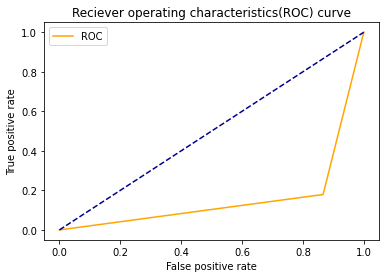

In [682]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operating characteristics(ROC) curve')
plt.legend()
plt.show()

# AUC score

In [683]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score*100)

84.35726057498627


# Saving the model in pickel format

In [684]:
import joblib
joblib.dump(accuracy_score(y_test, y_pred)*100,"CHURN")

['CHURN']

# Testing Model with Future Data for Output columns

In [688]:
X1.iloc[2]

0   -3.511698
1   -0.941575
2    0.176519
3    1.074031
4   -0.073806
5   -0.178254
6   -0.194171
7   -0.482130
8   -0.144806
Name: 2, dtype: float64

In [689]:
X1

,0,1,2,3,4,5,6,7,8
0,-0.834117,0.890760,1.690935,-1.190441,1.694088,0.968347,0.206449,1.191473,0.073841
1,-2.947696,0.098958,1.146644,-0.840110,1.080524,-1.295198,1.915610,-0.625964,0.073593
2,-3.511698,-0.941575,0.176519,1.074031,-0.073806,-0.178254,-0.194171,-0.482130,-0.144806
3,-0.498049,-1.956486,-2.524595,0.977702,0.381633,0.385943,-0.508141,0.713422,-0.150783
4,-0.437114,-1.963267,-0.325047,-0.860667,-0.734598,-2.027556,0.323065,0.300415,0.157579
...,...,...,...,...,...,...,...,...,...
9299,-2.299033,0.049106,1.196891,-1.203455,-0.004603,1.862133,-0.304155,0.256759,1.699275
9300,-0.756916,-0.079117,-1.863393,0.782199,1.018843,1.341475,-0.606288,1.302592,1.127775
9301,-2.823375,-0.398274,-0.714640,-1.057613,0.262716,0.421348,-0.733258,0.730291,0.551194
9302,-1.136052,-1.927779,1.039377,-1.106723,-1.623926,0.617260,0.556777,-0.058104,-0.874036


In [697]:
y.iloc[1]

1

In [698]:
t=np.array([-2.947696,0.098958,1.146644,-0.840110,1.080524,-1.295198,1.915610,-0.625964,0.073593])

In [699]:
t.shape

(9,)

In [700]:
x_train.shape

(8280, 9)

In [701]:
t=t.reshape(1,-1)
t.shape

(1, 9)

In [702]:
rf.predict(t) # selecting final model 

array([1])

The predicted Output for Income is matching with Actual otput and predicted output